# Вишинська Наталія, група ОІ-21сп, варіант 3, ЛР №3
## Опис даних:
### Набір даних складається з наступних стовпців:
- Type – тип тварини (1 – собака, 2 – кіт)
- Name – ім'я тварини
- Age – вік у місяцях
- Gender – стать тварини (1 – чоловіча, 2 – жіноча, 3 – невідома)
- MaturitySize – розмір дорослої особини (1 – маленька, 2 – середня, 3 – велика, 4 – дуже велика)
- FurLength – довжина шерсті (1 – коротка, 2 – середня, 3 – довга)
- Vaccinated – чи вакцинована тварина (1 – так, 2 – ні, 3 – невідомо)
- Dewormed – чи проглистована тварина
- Sterilized – чи стерилізована тварина
- Health – стан здоров'я (1 – здоровий, 2 – незначні проблеми, 3 – серйозні проблеми)
- AdoptionSpeed – швидкість усиновлення (0 – в день публікації, 1 – за тиждень, 2 – до місяця, 3 – після місяця, 4 – не був усиновлений)

In [2]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

# Зчитування даних
ds = pd.read_csv("./new_dataset.csv")

# Відновлюємо масштабовані значення 'AdoptionSpeed'
ds['AdoptionSpeed'] = (ds['AdoptionSpeed'] * 4).round().astype(int)

## Дані були оброблені (заповненні за модою, медіаною, для категоріальних - відповідним значенням, який вказує на пропущеність) у ПР № 2 і було видалено безіменний стовпець та створено новий файл з даними, які повністю заповнені
## Моделювання
### Класифікація

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import numpy as np

# Визначення цільової змінної
y_column = ['AdoptionSpeed']  # Швидкість усиновлення тваринки

# Визначення ознак
X_columns = ['Type', 'Gender', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'State']

X = ds[X_columns] # Ознаки
y = ds[y_column] # Цільова змінна

# Перевірка
print(X.head())
print(y.head())

   Type  Gender  MaturitySize  FurLength  Vaccinated  Dewormed  Sterilized  \
0   1.0     0.5           0.0        0.0         0.5       0.0         0.0   
1   1.0     1.0           0.0        0.5         0.5       0.5         0.0   
2   1.0     1.0           0.0        0.0         0.0       0.0         0.0   
3   1.0     0.5           0.0        0.0         1.0       1.0         0.0   
4   0.0     0.0           0.0        0.5         0.5       0.5         0.0   

   Health  State  
0     0.0  41326  
1     0.0  41326  
2     0.0  41326  
3     0.0  41326  
4     0.0  41326  
   AdoptionSpeed
0              1
1              1
2              1
3              4
4              3


### Тренувальні та тестові набори, моделі і валідація моделей

   Type  Gender  MaturitySize  FurLength  Vaccinated  Dewormed  Sterilized  \
0   1.0     0.5           0.0        0.0         0.5       0.0         0.0   
1   1.0     1.0           0.0        0.5         0.5       0.5         0.0   
2   1.0     1.0           0.0        0.0         0.0       0.0         0.0   
3   1.0     0.5           0.0        0.0         1.0       1.0         0.0   
4   0.0     0.0           0.0        0.5         0.5       0.5         0.0   

   Health  State  
0     0.0  41326  
1     0.0  41326  
2     0.0  41326  
3     0.0  41326  
4     0.0  41326  
[1 1 1 4 3]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Логістична регресія (LogisticRegression):
               precision    recall  f1-score   support

           0       1.00      0.00      0.00        25
           1       0.32      0.12      0.18       157
           2       0.06      0.01      0.02       184
           3       0.29      0.05      0.08       144
           4       0.25      0.82      0.38       168

    accuracy                           0.24       678
   macro avg       0.38      0.20      0.13       678
weighted avg       0.25      0.24      0.16       678

Рейтинг ознак для LogisticRegression з параметрами за замовчуванням:
1. Gender (0.633089)
2. Dewormed (0.470050)
3. FurLength (0.348792)
4. Type (0.203873)
5. Vaccinated (0.059057)
6. State (0.000031)
7. Health (0.000000)
8. Sterilized (0.000000)
9. MaturitySize (0.000000)


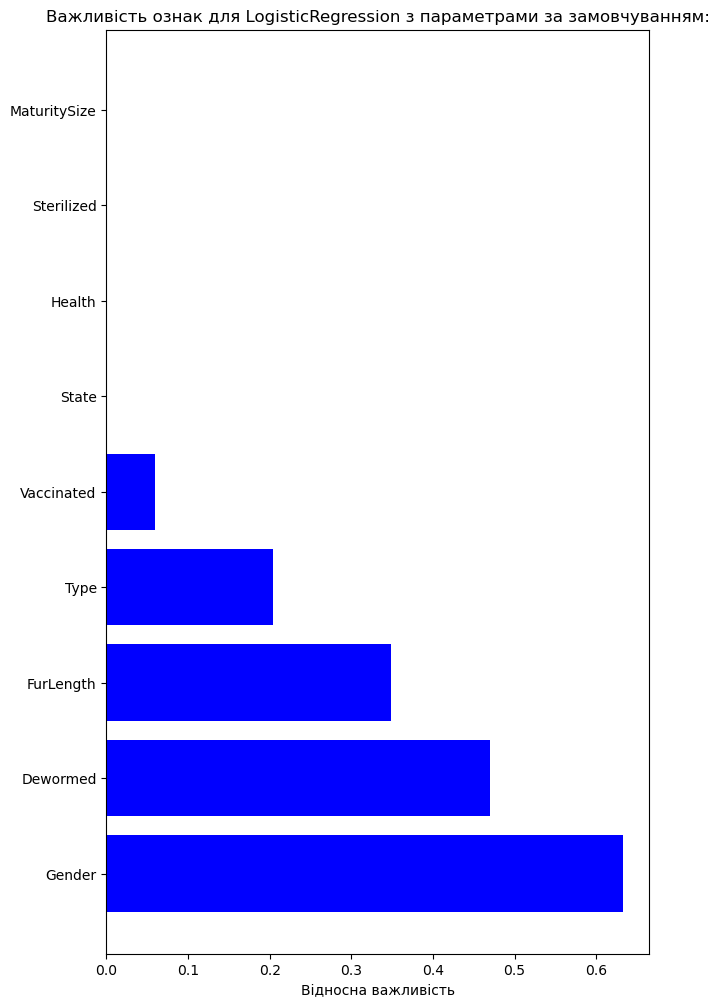

Оцінка ефективності для LogisticRegression:
Accuracy (точність правильних прогнозів): 0.2448377581120944
Precision (частка позитивних прогнозів): 0.3835929830592639
Recall (частка позитивних прогнозів, що були правильно виявлені): 0.20038567120746573
F1 Score (гармонійне середнє між Precision і Recall): 0.130923634269912
Матриця плутанини для LogisticRegression:
[[  0   2   2   0  21]
 [  0  19  10   5 123]
 [  0  16   2   6 160]
 [  0   7   9   7 121]
 [  0  16   8   6 138]]


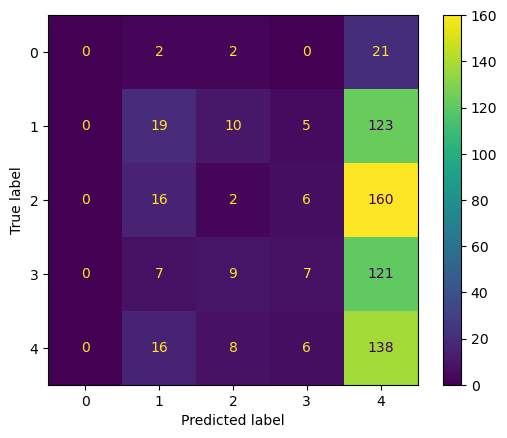

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

# Визначення цільової змінної
y_column = 'AdoptionSpeed'  # Швидкість усиновлення тваринки

# Визначення ознак
X_columns = ['Type', 'Gender', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'State']

X = ds[X_columns]  # Ознаки
y = ds[y_column]  # Цільова змінна

# Перетворення y на одномірний масив (як очікує модель)
y = y.values.ravel()

# Перевірка
print(X.head())
print(y[:5])

# Функція оцінки важливості ознак з виведенням графіка
def print_plot_feature_importances(classifier, X_train, X_columns, title=str):
    # Оцінка важливості ознак
    if hasattr(classifier, 'feature_importances_'):
        importances = classifier.feature_importances_
    elif hasattr(classifier, 'coef_'):
        importances = np.abs(classifier.coef_[0])
    else:
        print('Цей метод не дає оцінку важливості ознак')
        return
    
    indices = np.argsort(importances)[::-1]
    
    # Виведення рейтингу ознак
    print('Рейтинг ознак для ' + title + ':')
    for f in range(X_train.shape[1]):
        print(f"{f + 1}. {X_columns[indices[f]]} ({importances[indices[f]]:.6f})")
    
    # Побудова графіка
    plt.figure(figsize=(7, 12))
    plt.title('Важливість ознак для ' + title + ':')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [X_columns[i] for i in indices])
    plt.xlabel('Відносна важливість')
    plt.show()

# Функція виведення матриці плутанини і оцінки ефективності моделей
def print_plot_accuracy_confusion_matrix(y_test, y_pred, title=str):
    # Точність
    print('Оцінка ефективності для ' + title + ':')
    print('Accuracy (точність правильних прогнозів):', accuracy_score(y_test, y_pred))
    print('Precision (частка позитивних прогнозів):', precision_score(y_test, y_pred, average='macro', zero_division=1))
    print('Recall (частка позитивних прогнозів, що були правильно виявлені):', recall_score(y_test, y_pred, average='macro', zero_division=1))
    print('F1 Score (гармонійне середнє між Precision і Recall):', f1_score(y_test, y_pred, average='macro', zero_division=1))
    
    # Матриця плутанини
    print('Матриця плутанини для ' + title + ':')
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    
    # Відображення матриці плутанини
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot()
    plt.show()

# Розділення на тренувальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Логістична регресія (LogisticRegression) з параметрами за замовчуванням
reg_log = LogisticRegression(max_iter=1000)  # max_iter збільшено для стабільності
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)

# Оцінка і виведення результатів
print("Логістична регресія (LogisticRegression):\n", metrics.classification_report(y_test, y_pred, zero_division=1))
print_plot_feature_importances(reg_log, X_train, X_columns, 'LogisticRegression з параметрами за замовчуванням')
print_plot_accuracy_confusion_matrix(y_test, y_pred, 'LogisticRegression')

Баєсова класифікація (GaussianNB):
               precision    recall  f1-score   support

           0       1.00      0.00      0.00        25
           1       0.32      0.20      0.25       157
           2       0.27      0.16      0.20       184
           3       0.23      0.23      0.23       144
           4       0.28      0.54      0.37       168

    accuracy                           0.27       678
   macro avg       0.42      0.23      0.21       678
weighted avg       0.30      0.27      0.25       678

Оцінка ефективності для GaussianNB:
Accuracy (точність правильних прогнозів): 0.2728613569321534
Precision (частка позитивних прогнозів): 0.41844133641329184
Recall (частка позитивних прогнозів, що були правильно виявлені): 0.22645273700729254
F1 Score (гармонійне середнє між Precision і Recall): 0.20901200682314594
Матриця плутанини для GaussianNB:
[[ 0  5  6  6  8]
 [ 0 32 25 33 67]
 [ 0 27 29 40 88]
 [ 0 13 29 33 69]
 [ 0 24 20 33 91]]


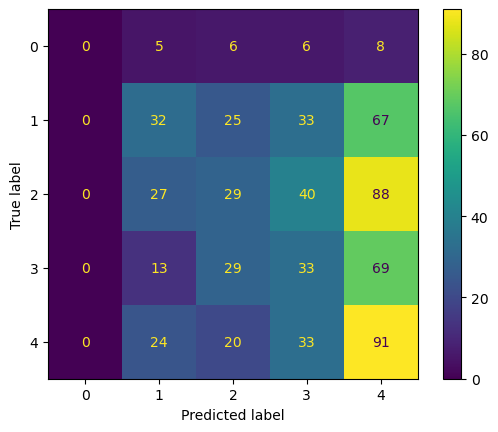

In [15]:
from sklearn.naive_bayes import GaussianNB

# Баєсова класифікація (GaussianNB) з параметрами за замовчуванням
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)
y_pred = gnb_classifier.predict(X_test)

# Виведення звіту про класифікацію
print("Баєсова класифікація (GaussianNB):\n", metrics.classification_report(y_test, y_pred, zero_division=1))

# Функція оцінки важливості ознак (з модифікацією для GaussianNB)
def print_plot_feature_importances(classifier, X_train, X_columns, title=str):
    # Перевірка наявності важливості ознак
    if hasattr(classifier, 'feature_importances_'):
        importances = classifier.feature_importances_
    elif hasattr(classifier, 'coef_'):
        importances = np.abs(classifier.coef_[0])
    else:
        print('Цей метод не дає оцінку важливості ознак для GaussianNB')
        return
    
    indices = np.argsort(importances)[::-1]
    
    # Виведення рейтингу ознак
    print('Рейтинг ознак для ' + title + ':')
    for f in range(X_train.shape[1]):
        print(f"{f + 1}. {X_columns[indices[f]]} ({importances[indices[f]]:.6f})")
    
    # Побудова графіка
    plt.figure(figsize=(7, 12))
    plt.title('Важливість ознак для ' + title + ':')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [X_columns[i] for i in indices])
    plt.xlabel('Відносна важливість')
    plt.show()

# Виклик функції для виводу важливості ознак не потрібно, тому що GaussianNB не має важливості ознак
# print_plot_feature_importances(gnb_classifier, X_train, X_columns, 'GaussianNB з параметрами за замовчуванням')

# Виведення матриці плутанини та оцінки ефективності
print_plot_accuracy_confusion_matrix(y_test, y_pred, 'GaussianNB')


Випадковий ліс (RandomForestClassifier):
               precision    recall  f1-score   support

           0       0.17      0.04      0.06        25
           1       0.25      0.18      0.21       157
           2       0.24      0.22      0.23       184
           3       0.20      0.18      0.19       144
           4       0.26      0.40      0.31       168

    accuracy                           0.24       678
   macro avg       0.22      0.20      0.20       678
weighted avg       0.23      0.24      0.23       678

Рейтинг ознак для RandomForestClassifier з параметрами за замовчуванням:
1. State (0.328483)
2. Gender (0.186773)
3. FurLength (0.163538)
4. Vaccinated (0.114051)
5. Dewormed (0.112926)
6. Type (0.094229)
7. Health (0.000000)
8. Sterilized (0.000000)
9. MaturitySize (0.000000)


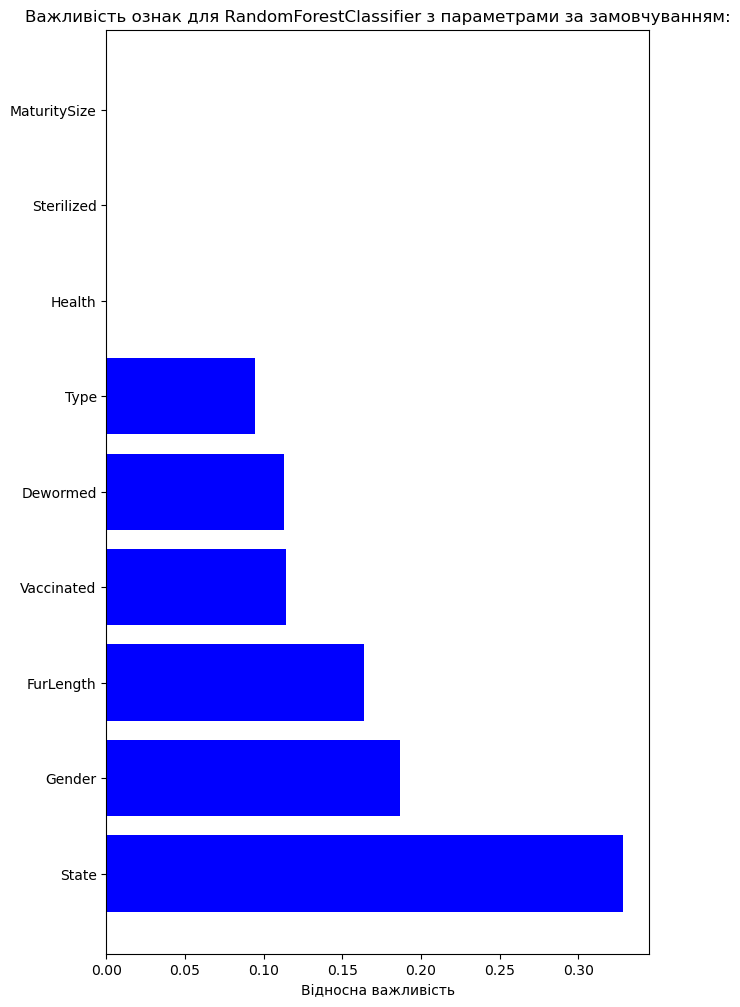

Оцінка ефективності для RandomForestClassifier:
Accuracy (точність правильних прогнозів): 0.23893805309734514
Precision (частка позитивних прогнозів): 0.221452948376413
Recall (частка позитивних прогнозів, що були правильно виявлені): 0.2030200665514983
F1 Score (гармонійне середнє між Precision і Recall): 0.20029638170520658
Матриця плутанини для RandomForestClassifier:
[[ 1  6 10  5  3]
 [ 0 28 48 31 50]
 [ 2 36 40 32 74]
 [ 1 18 35 26 64]
 [ 2 26 37 36 67]]


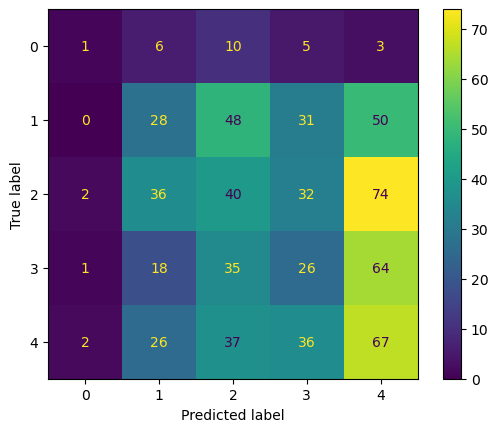

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Випадковий ліс (RandomForestClassifier) з параметрами за замовчуванням
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

# Виведення звіту про класифікацію
print("Випадковий ліс (RandomForestClassifier):\n", metrics.classification_report(y_test, y_pred, zero_division=1))

# Виклик функції для оцінки важливості ознак
print_plot_feature_importances(rf_classifier, X_train, X_columns, 'RandomForestClassifier з параметрами за замовчуванням')

# Виведення матриці плутанини та оцінки ефективності
print_plot_accuracy_confusion_matrix(y_test, y_pred, 'RandomForestClassifier')


### Порівняння методів класифікації
- 1. Логістична регресія:
  - Принцип роботи: Використовує логістичну функцію для моделювання ймовірності належності об'єкта до певного класу. Підходить для бінарних та багатокласових задач.
  - Переваги: Легка у реалізації та інтерпретації. Добре працює при наявності лінійної залежності між ознаками та цільовою змінною.
  - Недоліки: Чутлива до аномальних значень і неефективна при складних, нелінійних залежностях.
- 2. Баєсова класифікація (Gaussian Naive Bayes):
  - Принцип роботи: Використовує теорію Баєса, виходячи з умовної ймовірності. Припускає незалежність ознак, що часто не відповідає дійсності.
  - Переваги: Простота та швидкість навчання. Чудово підходить для текстової класифікації та великих обсягів даних.
  - Недоліки: Припущення про незалежність ознак може суттєво вплинути на точність при реальних даних. Не підходить для складних задач з взаємозалежними ознаками.
- 3. Випадковий ліс (Random Forest):
  - Принцип роботи: Використовує ансамбль дерев рішень, створюючи багато дерев, які голосують за фінальне рішення. Зменшує ймовірність переобучення.
  - Переваги: Висока точність, здатність до обробки великих обсягів даних і різноманітних ознак. Добре працює при відсутності явної моделі залежностей.
  - Недоліки: Вища складність та менша інтерпретованість у порівнянні з логістичною регресією. Потребує більше ресурсів для навчання та прогнозування.
### Висновки
#### У результаті порівняння трьох методів класифікації: логістичної регресії, баєсової класифікації та випадкового лісу, можна зробити наступні висновки:
- Логістична регресія є відмінним вибором для простих задач з лінійними залежностями між ознаками, завдяки своїй легкості в реалізації та інтерпретації. Проте її обмеження у роботі з нелінійними залежностями роблять її менш універсальною.

- Баєсова класифікація добре підходить для ситуацій з великими обсягами даних, де швидкість і простота є критичними. Однак її припущення про незалежність ознак можуть вплинути на точність моделі, особливо в складних ситуаціях.

- Випадковий ліс демонструє високу точність і стійкість до переобучення, роблячи його потужним інструментом для роботи з різноманітними даними. Однак його складність може бути недоліком у випадках, коли потрібна проста та зрозуміла модель.

#### Таким чином, вибір методу класифікації залежить від специфіки задачі, типу даних та вимог до точності і швидкості. В ідеалі доцільно проводити експерименти з кількома методами для вибору найбільш підходящого.